In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('student_data.csv')
data[:5]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


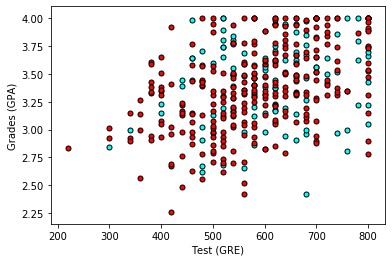

In [5]:
import matplotlib.pyplot as plt
def plot_points(data):
    X=np.array(data[["gre","gpa"]])
    y=np.array(data["admit"])
    admitted=X[np.argwhere(y==1)]
    rejected=X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted],[s[0][1] for s in admitted], s=25, color='cyan',edgecolor='k')
    plt.scatter([s[0][0] for s in rejected],[s[0][1] for s in rejected], s=25, color='red',edgecolor='k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()

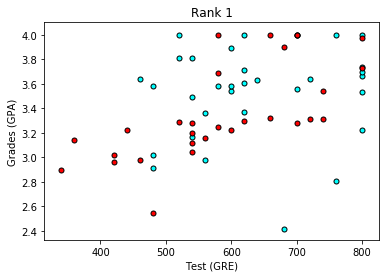

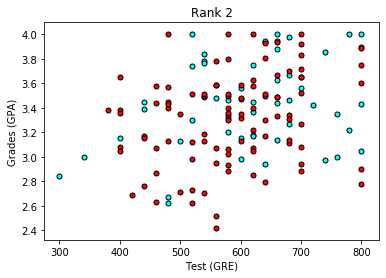

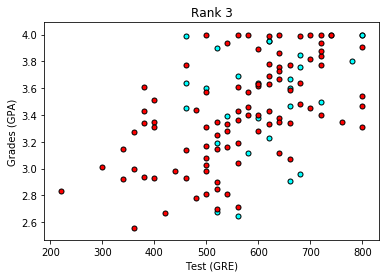

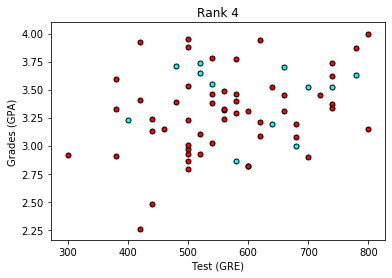

In [6]:
#Seperating ranks
rank1=data[data["rank"]==1]
rank2=data[data["rank"]==2]
rank3=data[data["rank"]==3]
rank4=data[data["rank"]==4]

#Plotting the data rankwise by calling plot_points function
plot_points(rank1)
plt.title('Rank 1')
plt.show()
plot_points(rank2)
plt.title('Rank 2')
plt.show()
plot_points(rank3)
plt.title('Rank 3')
plt.show()
plot_points(rank4)
plt.title('Rank 4')
plt.show()

# One-Hot Encoding

In [7]:
one_hot_data=pd.concat([data,pd.get_dummies(data['rank'],prefix='rank')],axis=1)
one_hot_data=one_hot_data.drop('rank',axis=1)


# Scaling of Columns

In [8]:
one_hot_data['gre']=one_hot_data['gre']/400
one_hot_data['gpa']=one_hot_data['gpa']/4

# Splitting data into training and testing(90% training 10% testing)

In [9]:
sample = np.random.choice(one_hot_data.index, size=int(len(one_hot_data)*0.9), replace=False)
train_data, test_data = one_hot_data.iloc[sample], one_hot_data.drop(sample)

# Splitting the data into features and target

In [22]:
features=train_data.drop('admit',axis=1)
targets=train_data['admit']
features_test=test_data.drop('admit',axis=1)
targets_test=test_data['admit']


# Training the 2 layer Neural Network

In [11]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Backpropogate the Error

In [20]:
def error_term_formula(x,y,output):
    return (y-output)*sigmoid_prime(x)

In [47]:
epochs=1000
learning_rate=0.5
# Training the function
def train_nn(features, targets, epochs, learnrate):
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            output = sigmoid(np.dot(x, weights))
            error = error_formula(y, output)
            error_term = error_term_formula(x, y, output)
            del_w += error_term * x
        weights += learnrate * del_w / n_records
        
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.23010403067595406
Epoch: 100
Train loss:  0.2186428037828819
Epoch: 200
Train loss:  0.2127741688379782
Epoch: 300
Train loss:  0.2098394584506407
Epoch: 400
Train loss:  0.2083982132794317
Epoch: 500
Train loss:  0.20769182145332635
Epoch: 600
Train loss:  0.20734459760845855
Epoch: 700
Train loss:  0.2071742757041146
Epoch: 800
Train loss:  0.20709228183813447
Epoch: 900
Train loss:  0.20705507739724388
Finished training!


In [48]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.750
